In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
file = "/content/Ulta Skincare Reviews.csv"
df = pd.read_csv(file)
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023


Exploratory Data Analysis (EDA)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,Review_Upvotes,Review_Downvotes,score,sentiment
count,4149.000000,4149.000000,4149.000000,4149.000000
mean,0.590986,0.161244,0.580326,0.845023
std,2.210199,0.912668,0.363861,0.361926
min,0.000000,0.000000,-0.858200,0.000000
25%,0.000000,0.000000,0.381800,1.000000
50%,0.000000,0.000000,0.659700,1.000000
75%,0.000000,0.000000,0.872000,1.000000
max,84.000000,35.000000,0.994700,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4149 entries, 0 to 4149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Review_Title      4149 non-null   object 
 1   Review_Text       4149 non-null   object 
 2   Verified_Buyer    4149 non-null   object 
 3   Review_Date       4149 non-null   object 
 4   Review_Location   4149 non-null   object 
 5   Review_Upvotes    4149 non-null   int64  
 6   Review_Downvotes  4149 non-null   int64  
 7   Product           4149 non-null   object 
 8   Brand             4149 non-null   object 
 9   Scrape_Date       4149 non-null   object 
 10  score             4149 non-null   float64
 11  sentiment         4149 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 421.4+ KB


In [ ]:
df.Product.unique()


array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

In [ ]:
df.Brand.unique()

array(['Dermalogica'], dtype=object)

In [ ]:
df.Scrape_Date.unique()

array(['3/27/2023'], dtype=object)

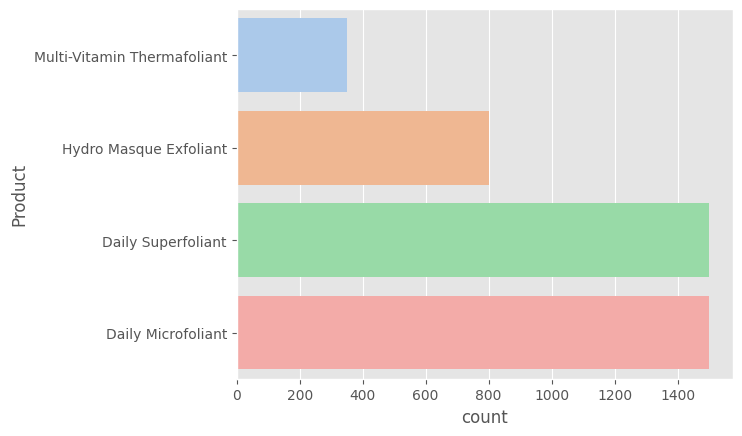

In [ ]:
sns.countplot(data = df, y= 'Product', orient = 'V', palette = 'pastel')
#plt.xticks(rotation =45)
plt.show()

<ipython-input-49-dffd3a9d1b54>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product').sum()['Review_Upvotes'].plot(kind = 'barh', color='#00CC91')


<Axes: ylabel='Product'>

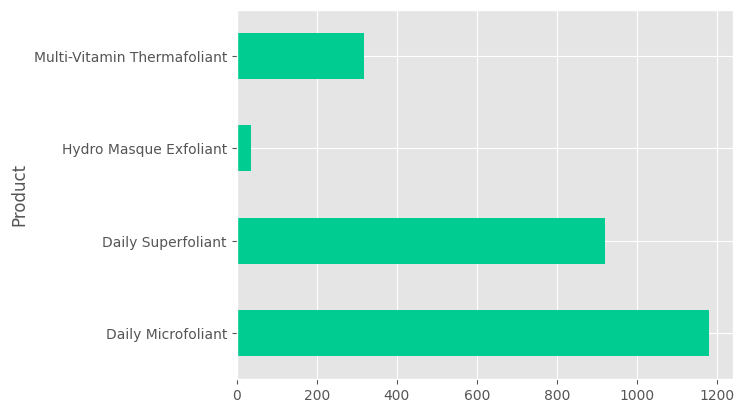

In [ ]:
df.groupby('Product').sum()['Review_Upvotes'].plot(kind = 'barh', color='#00CC91')

<ipython-input-50-a0f3e21f9220>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product').sum()['Review_Downvotes'].plot(kind = 'barh', color='#00CC91')


Text(0.5, 1.0, 'Review Downvotes Productwise')

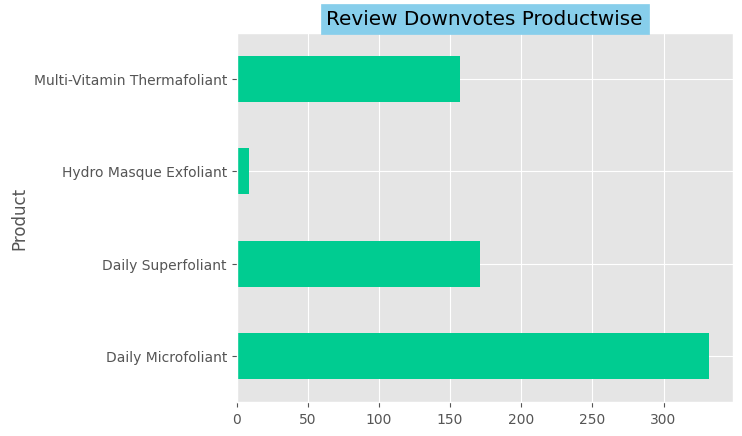

In [ ]:
df.groupby('Product').sum()['Review_Downvotes'].plot(kind = 'barh', color='#00CC91')
plt.title('Review Downvotes Productwise', backgroundcolor = 'skyblue')

<Axes: xlabel='Verified_Buyer', ylabel='count'>

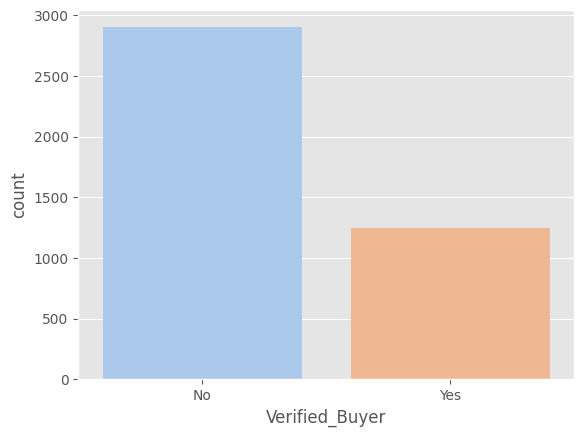

In [ ]:
sns.countplot(data = df, x = 'Verified_Buyer', palette = 'pastel')

In [ ]:
#HTML Tags removal
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)


def clean_re(text):
    regex = re.compile('[^a-z\s]')
    return regex


In [ ]:
#Remove links
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


import string
exclude = string.punctuation

def remove_punc(text):
    if not isinstance(text, str):
        text = str(text)
    return text.translate(str.maketrans('', '', exclude))



In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install emoji

In [ ]:

#Remove Emoji
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [ ]:
##Replace Emoji with words
import emoji
def demojize(text):
    return emoji.demojize(text)


In [ ]:
##Tokenisation with NLTK
from nltk.tokenize import word_tokenize,sent_tokenize
def word_tokenize_nltk(text):
    return word_tokenize(text)

##Tokenisation with spacy
import spacy
nlp = spacy.load('en_core_web_sm')
def word_tokenize_spacy(text):
    return nlp(text)


In [ ]:
##Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(token.text) for token in nlp(text)])

##Lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatize_words(text):
    doc = nlp(text)
    return " ".join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc])



In [ ]:
##Main Func
def preprocess_inputs(df):
    df = df.copy()
    df['Review_Text'] = df['Review_Text'].str.lower()

    df['Review_Text'] = df['Review_Text'].apply(remove_punc)
    df['Review_Text'] = df['Review_Text'].apply(remove_stopwords)
    df['Review_Text'] = df['Review_Text'].apply(demojize)
    df['Review_Text'] = df['Review_Text'].apply(word_tokenize_spacy)
    df['Review_Text'] = df['Review_Text'].apply(lemmatize_words)

    cols = ['Scrape_Date', 'Brand']
    df = df.drop(cols, axis = 1)

    return df

In [ ]:
X = preprocess_inputs(df)
X


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product
0,Perfect,love use face shower heat give light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
1,You need this,even well daily microfoliant I m obsess skin m...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
2,Clean skin,enjoy product much look forward use really fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
3,Love This Stuff!,I ve never try anything like love apply face g...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
4,This exfoliates very nicely and,exfoliate nicely give smooth skin irritation r...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much well product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant
4146,Gentle exfoliant- leaves skin smooth & soft,I ve use exfoliant month depend condition skin...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant
4147,One of my favorite skincare products of all time.,skin look well 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant
4148,Ehhh...,product useless should ve know exfoliant use d...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant


Text(0, 0.5, 'Frequency')

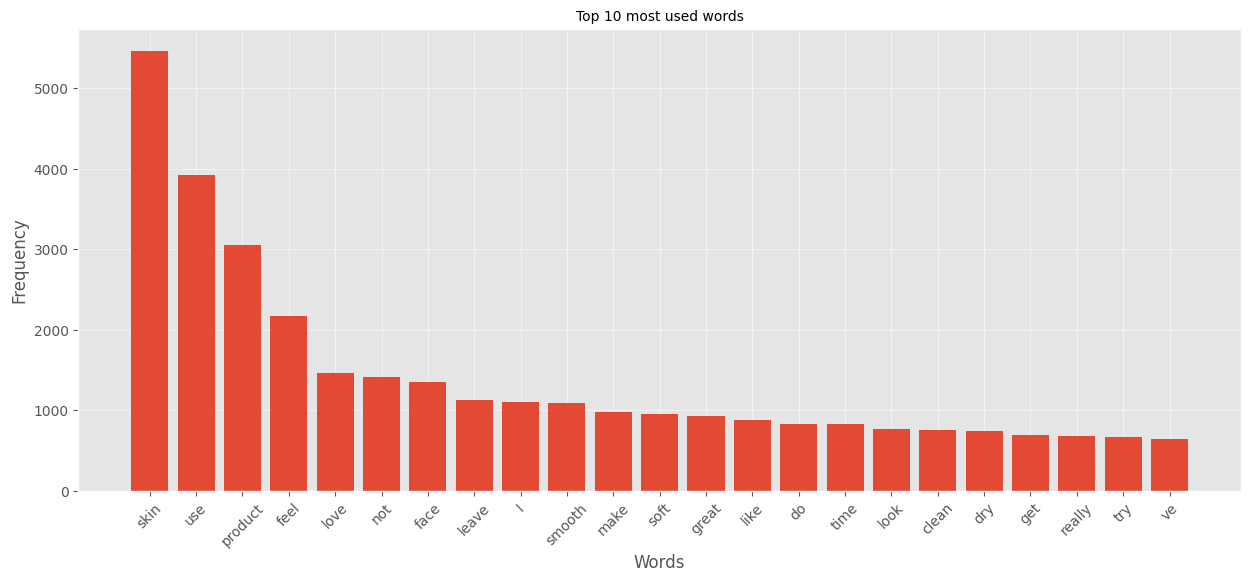

In [ ]:
import collections

words = []
for text in X['Review_Text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(23))
top_words


# Figure Size
plt.figure(figsize = (15, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title
plt.title('Top 10 most used words', fontsize = 10)
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Words')
plt.ylabel('Frequency')


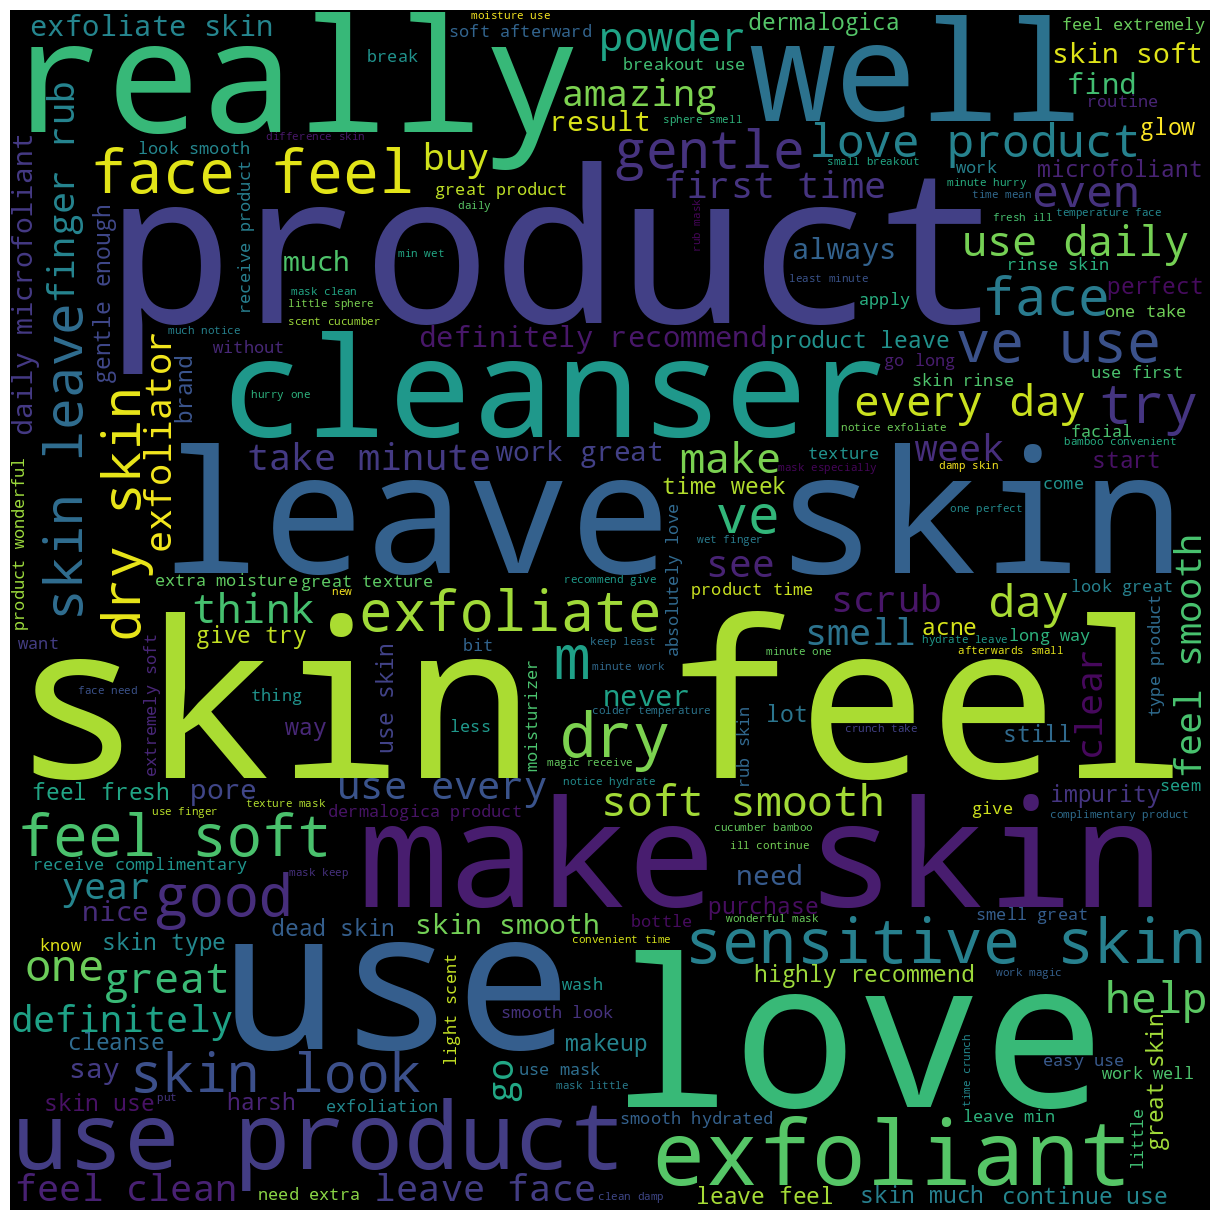

In [ ]:
from wordcloud import WordCloud

text = ' '.join(w for w in X['Review_Text'])

wordcloud = WordCloud(width = 1200, height = 1200, background_color = 'black', min_font_size = 10).generate(text)

# plt.title('Top 10 most used words in all the Preamble', backgroundcolor = 'skyblue')
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud.png')
plt.show()

In [ ]:
##HTML Tags removal
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)


def clean_re(text):
    regex = re.compile('[^a-z\s]')
    return regex

In [ ]:
## Remove links
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


import string

exclude = string.punctuation

def remove_punc(text):
    if not isinstance(text, str):
        text = str(text)
    return text.translate(str.maketrans('', '', exclude))




In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)



In [ ]:
##Remove Emoji
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


## Replace Emoji with words
import emoji
def demojize(text):
    return emoji.demojize(text)


In [ ]:

## Tokenisation with NLTK
from nltk.tokenize import word_tokenize,sent_tokenize
def word_tokenize_nltk(text):
    return word_tokenize(text)

## Tokenisation with spacy
import spacy
nlp = spacy.load('en_core_web_sm')
def word_tokenize_spacy(text):
    return nlp(text)


In [ ]:
## Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(token.text) for token in nlp(text)])


## Lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatize_words(text):
    doc = nlp(text)
    return " ".join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in doc])


In [ ]:

## Main Func

def preprocess_inputs(df):
    df = df.copy()
    df['Review_Title'] = df['Review_Title'].str.lower()

    df['Review_Title'] = df['Review_Title'].apply(remove_punc)
    df['Review_Title'] = df['Review_Title'].apply(remove_stopwords)
    df['Review_Title'] = df['Review_Title'].apply(demojize)
    df['Review_Title'] = df['Review_Title'].apply(word_tokenize_spacy)
    df['Review_Title'] = df['Review_Title'].apply(lemmatize_words)

    cols = ['Scrape_Date', 'Brand']
    df = df.drop(cols, axis = 1)

    return df

In [ ]:
X = preprocess_inputs(df)
X

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product
0,perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
1,need,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
2,clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
3,love stuff,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
4,exfoliate nicely,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant
...,...,...,...,...,...,...,...,...
4145,would buy product,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant
4146,gentle exfoliant leave skin smooth soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant
4147,one favorite skincare product time,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant
4148,ehhh,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant


Text(0, 0.5, 'Frequency')

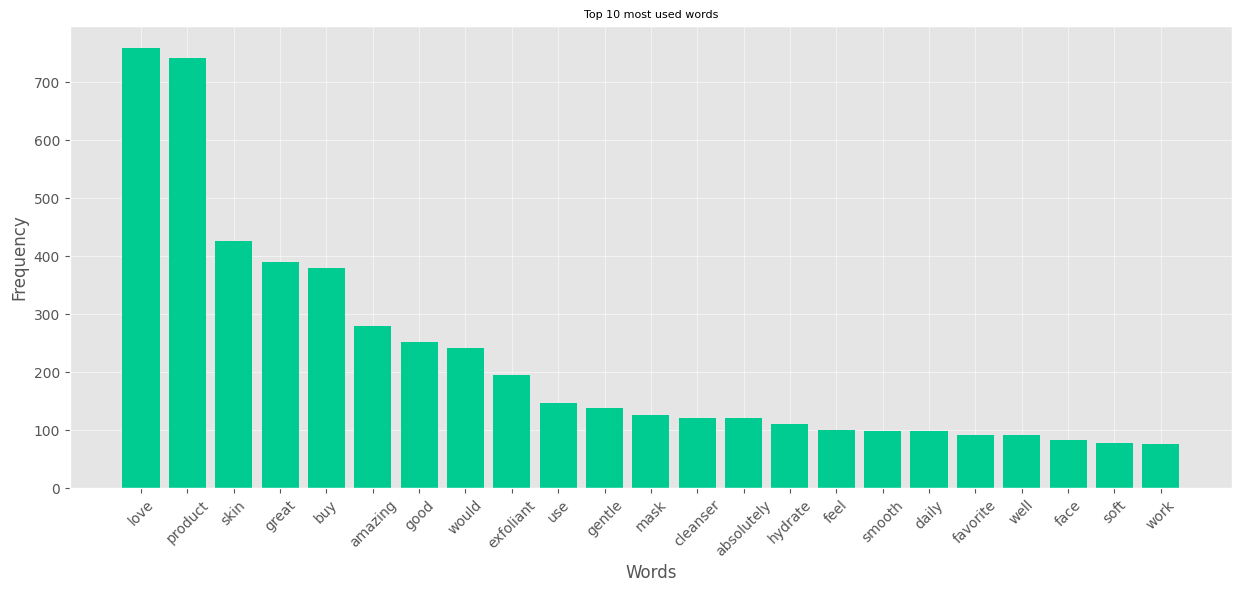

In [ ]:
import collections

words = []
for text in X['Review_Title']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(23))
top_words



# Figure Size
plt.figure(figsize = (15, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center', color = '#00CC91')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title
plt.title('Top 10 most used words', fontsize = 8)
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Words')
plt.ylabel('Frequency')

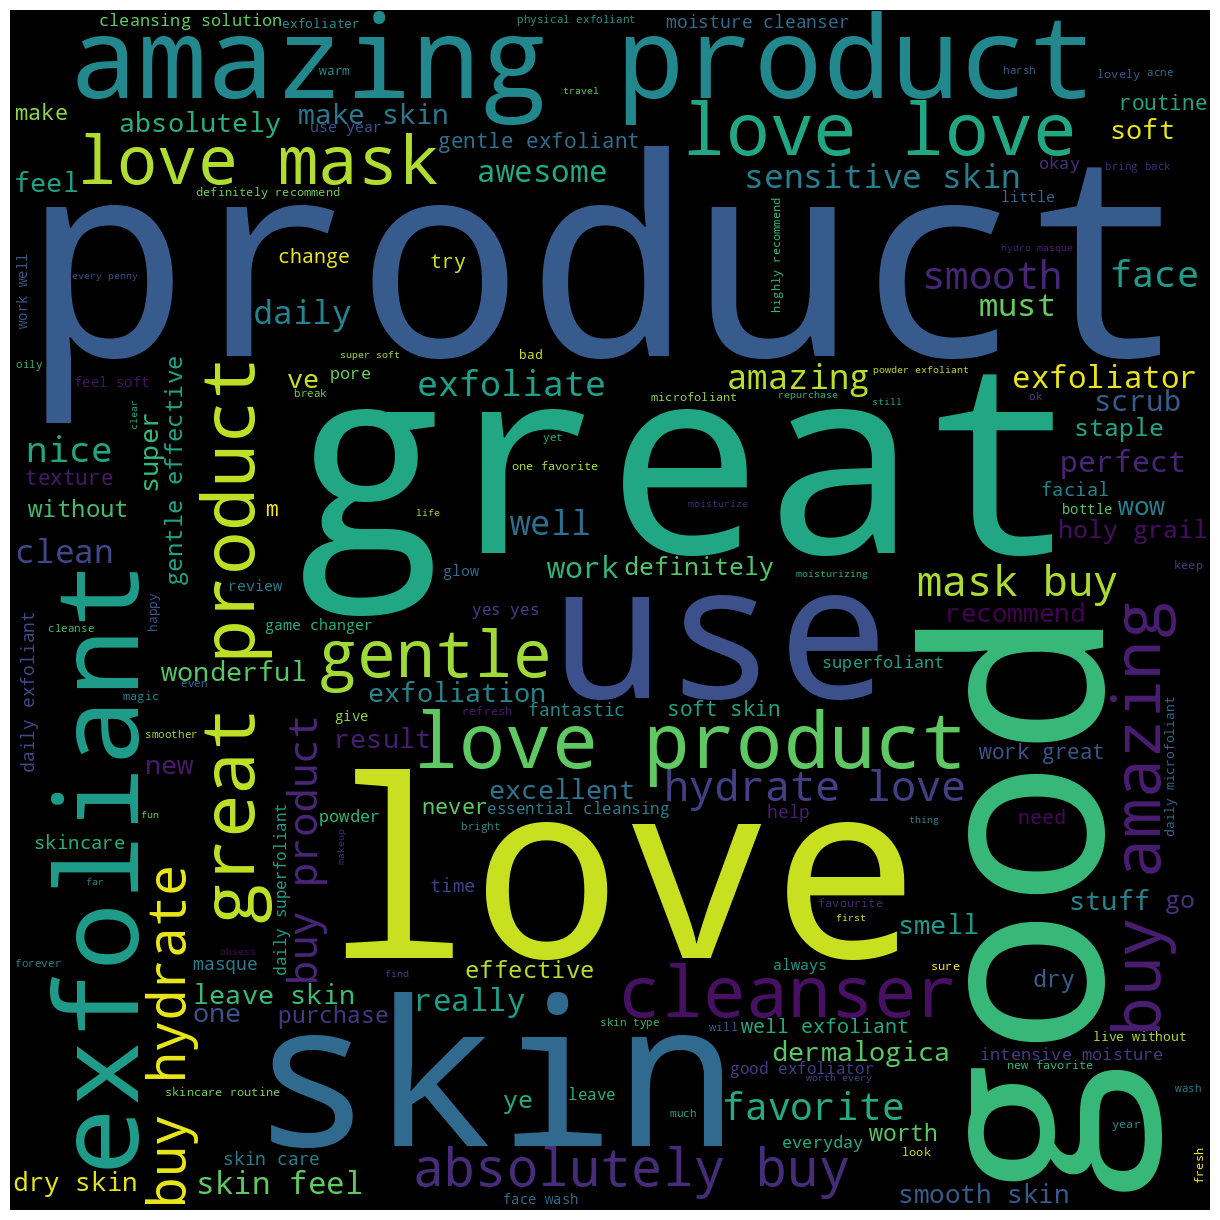

In [ ]:
from wordcloud import WordCloud

text = ' '.join(w for w in X['Review_Title'])

wordcloud = WordCloud(width = 1200, height = 1200, background_color = 'black', min_font_size = 10).generate(text)

# plt.title('Top 10 most used words in all the Preamble', backgroundcolor = 'skyblue')
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud.png')
plt.show()

Sentiment Analysis by using Naive Bayes:

Preprocessing :

In [ ]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.lower())
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x))
df['Review_Text'] = df['Review_Text'].apply(lambda x: word_tokenize(x))
df['Review_Text']

0       [love, using, this, on, my, face, while, in, t...
1       [even, better, than, the, daily, microfoliant,...
2       [enjoy, this, product, so, much, i, look, forw...
3       [i, ve, never, tried, anything, like, this, be...
4       [this, exfoliates, very, nicely, and, gives, a...
                              ...                        
4145              [much, better, product, than, a, scrub]
4146    [i, ve, been, using, this, exfoliant, for, a, ...
4147    [my, skin, looks, better, now, than, 10, years...
4148    [this, product, was, useless, for, me, i, shou...
4149    [this, product, is, amazing, it, is, the, only...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
df['Review_Text']

0       [love, using, face, shower, heats, gives, ligh...
1       [even, better, daily, microfoliant, obsessed, ...
2       [enjoy, product, much, look, forward, using, r...
3       [never, tried, anything, like, love, apply, fa...
4       [exfoliates, nicely, gives, smooth, skin, irri...
                              ...                        
4145                       [much, better, product, scrub]
4146    [using, exfoliant, months, depending, conditio...
4147                [skin, looks, better, 10, years, ago]
4148    [product, useless, known, exfoliant, use, dail...
4149    [product, amazing, thing, helps, dry, patches,...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
ps=PorterStemmer()
df['Review_Text'] = df['Review_Text'].apply(lambda x: [ps.stem(y) for y in x])
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join(x))
df['Review_Text']

0         love use face shower heat give light scrub nice
1       even better daili microfoli obsess skin much s...
2       enjoy product much look forward use realli fee...
3       never tri anyth like love appli face get littl...
4       exfoli nice give smooth skin irrit reaction sk...
                              ...                        
4145                            much better product scrub
4146    use exfoli month depend condit skin use anywhe...
4147                         skin look better 10 year ago
4148    product useless known exfoli use daili would g...
4149    product amaz thing help dri patch cheek also c...
Name: Review_Text, Length: 4150, dtype: object

In [ ]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['score']=df['Review_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df
# the score ranges from -1 to 1 with -1 being the most negative , 0 neutral and 1 being postive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.0 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.7906
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.2263
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.8074
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.7839
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.6486
...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/2023,0.4404
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/2023,0.5100
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/2023,0.4404
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/2023,0.1027


In [ ]:
df['sentiment'] = df['score'].apply(lambda x: 1 if x>0 else 0)
df

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,sentiment
0,Perfect,love use face shower heat give light scrub nice,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.7906,1
1,You need this,even better daili microfoli obsess skin much s...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.2263,1
2,Clean skin,enjoy product much look forward use realli fee...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.8074,1
3,Love This Stuff!,never tri anyth like love appli face get littl...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.7839,1
4,This exfoliates very nicely and,exfoli nice give smooth skin irrit reaction sk...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/2023,0.6486,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,much better product scrub,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/2023,0.4404,1
4146,Gentle exfoliant- leaves skin smooth & soft,use exfoli month depend condit skin use anywhe...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/2023,0.5100,1
4147,One of my favorite skincare products of all time.,skin look better 10 year ago,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/2023,0.4404,1
4148,Ehhh...,product useless known exfoli use daili would g...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/2023,0.1027,1


In [ ]:
df['sentiment'].value_counts()

1    3506
0     644
Name: sentiment, dtype: int64

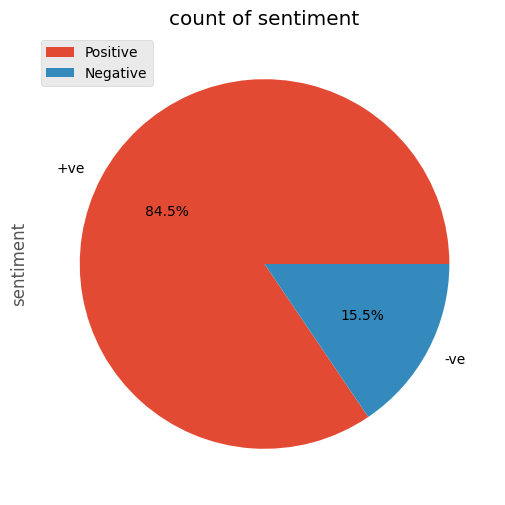

In [ ]:
df['sentiment'].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

Bag Of Words

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df['Review_Text'])

In [ ]:
#Train Test Split
X=x.toarray()
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
#Smote
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
#Naive Bayes
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
#Metrics
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score is ',accuracy)

cr=classification_report(y_test,y_pred)
print(cr)

Accuracy score is  0.8618473895582329
              precision    recall  f1-score   support

           0       0.75      0.20      0.32       199
           1       0.87      0.99      0.92      1046

    accuracy                           0.86      1245
   macro avg       0.81      0.59      0.62      1245
weighted avg       0.85      0.86      0.83      1245



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  40  159]
 [  13 1033]]


[[  40  159]
 [  13 1033]]


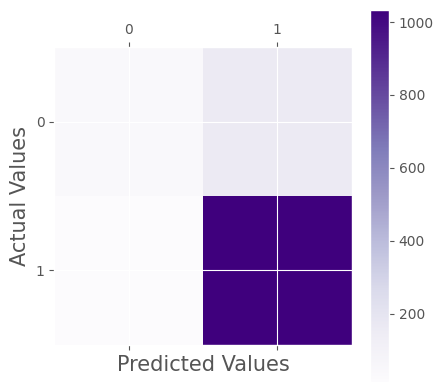

In [ ]:
plt.matshow(cm,cmap=plt.cm.Purples)
plt.colorbar()
plt.ylabel('Actual Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
print(cm)